In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
from sklearn import tree
import graphviz

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

載入資料

In [11]:
data = pd.read_csv("contract.csv")
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UID                   10000 non-null  int64  
 1   Prod_output_num       10000 non-null  int64  
 2   click_on_prod         10000 non-null  int64  
 3   locations             10000 non-null  object 
 4   gender                10000 non-null  object 
 5   age                   10000 non-null  int64  
 6   balance               10000 non-null  float64
 7   registry_to_use_time  10000 non-null  int64  
 8   credit_card_paid      10000 non-null  int64  
 9   active_member         10000 non-null  int64  
 10  estimated_salary      10000 non-null  float64
 11  buy                   10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


,UID,Prod_output_num,click_on_prod,age,balance,registry_to_use_time,credit_card_paid,active_member,estimated_salary,buy
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,5.012800,650.528800,38.921800,76485.889288,3.469800,0.70550,0.484900,100090.239881,0.203700
std,2886.89568,2.892174,96.653299,10.487806,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,0.00000,0.000000,350.000000,18.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2499.75000,3.000000,584.000000,32.000000,0.000000,3.000000,0.00000,0.000000,51002.110000,0.000000
50%,4999.50000,5.000000,652.000000,37.000000,97198.540000,4.000000,1.00000,0.000000,100193.915000,0.000000
75%,7499.25000,7.000000,718.000000,44.000000,127644.240000,4.000000,1.00000,1.000000,149388.247500,0.000000
max,9999.00000,10.000000,850.000000,92.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


分類前的資料處理與轉換，獨熱編碼

In [12]:
import pandas as pd

data_encode = pd.get_dummies(data)
data_encode

,UID,Prod_output_num,click_on_prod,age,balance,registry_to_use_time,credit_card_paid,active_member,estimated_salary,buy,locations_Taichung,locations_Tainan,locations_Taipei,gender_Female,gender_Male
0,0,2,619,42,0.00,4,1,0,101348.88,1,False,False,True,True,False
1,1,1,608,41,83807.86,4,0,0,112542.58,0,False,True,False,True,False
2,2,8,502,42,159660.80,2,1,1,113931.57,1,False,False,True,True,False
3,3,1,699,39,0.00,3,0,1,93826.63,0,False,False,True,True,False
4,4,2,850,43,125510.82,4,1,0,79084.10,0,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,5,771,39,0.00,3,1,1,96270.64,0,False,False,True,False,True
9996,9996,10,516,35,57369.61,4,1,0,101699.77,0,False,False,True,False,True
9997,9997,7,709,36,0.00,4,0,0,42085.58,1,False,False,True,True,False
9998,9998,3,772,42,75075.31,3,1,1,92888.52,1,True,False,False,False,True


定義 $X$, $y$。

In [13]:
X = data_encode.drop(columns=["buy", "UID"])
y = data_encode["buy"]

建立決策樹模型。

In [14]:
dt_model = tree.DecisionTreeClassifier(max_depth=(4))

dt_model.fit(X, y)

DecisionTreeClassifier(max_depth=4)

提取特徵重要性。

In [15]:
feature_importances = dt_model.feature_importances_
features = X.columns

將特徵重要性可視化。

Text(0.5, 1.0, 'Feature Importance in Decision Tree Model')

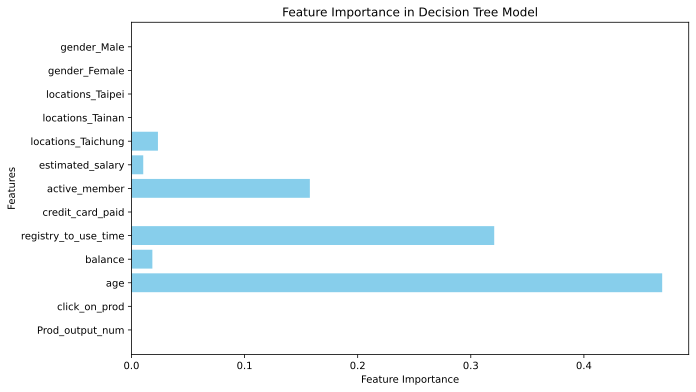

In [16]:
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree Model")

產生影像的 dot 資料。

In [17]:
dot_data = tree.export_graphviz(
    dt_model,
    feature_names=X.columns.to_list(),
    class_names=['0', '1'],
    filled=True,
    rounded=True,
    special_characters=(True),
)

建立 Graphviz 物件並顯示。

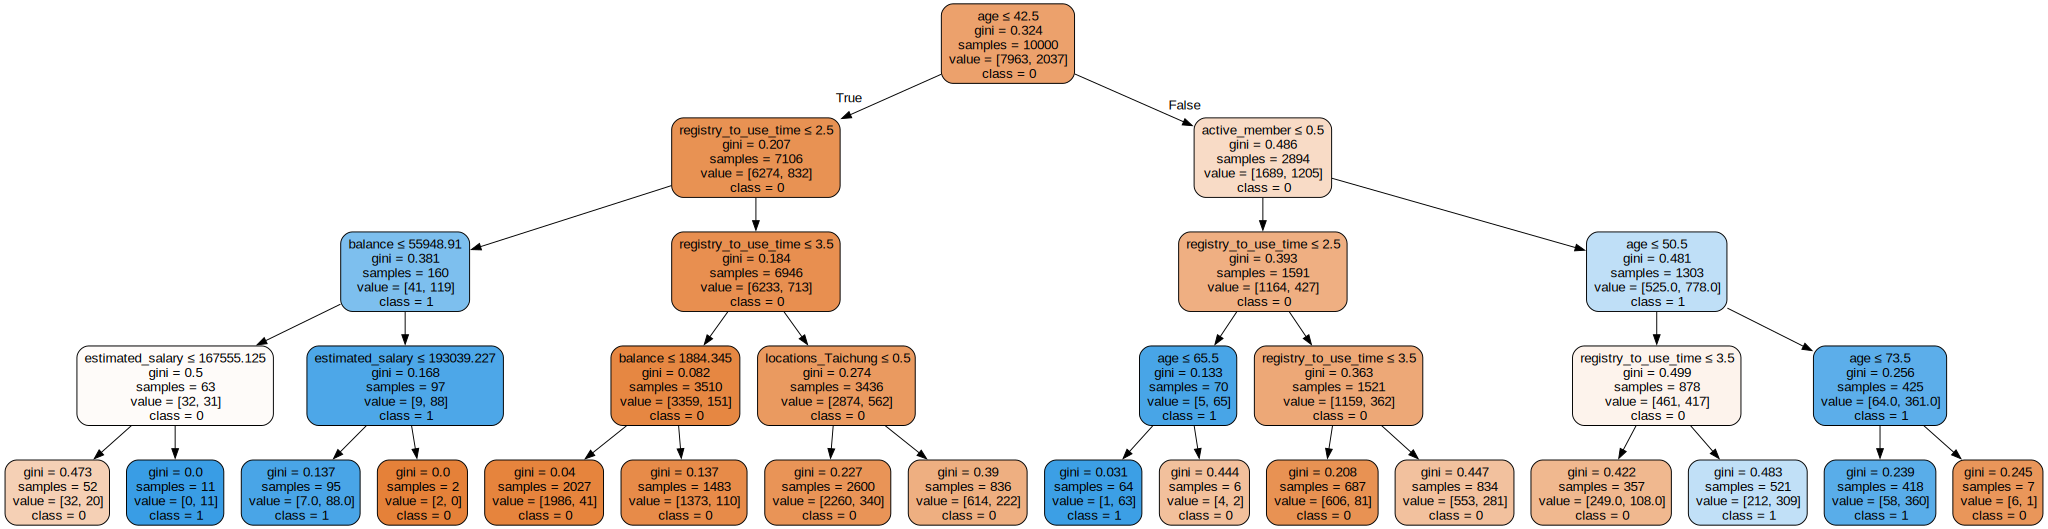

In [18]:
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png")
graph